In [1]:
#install nltk
!pip install nltk
!pip install streamlit
!pip install wordcloud
!pip install seaborn
!pip install scikit-learn




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\srish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\srish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\srish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\srish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\srish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#read imdb csv
df=pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [6]:
df.shape


(500, 2)

In [7]:
df['Sentiment'].value_counts()

Sentiment
negative    263
positive    237
Name: count, dtype: int64

In [8]:
df.dropna(  inplace = True)

In [9]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [10]:
df['Review']=df['Review'].apply(clean_review)

In [11]:
df.head()

,Review,Sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive


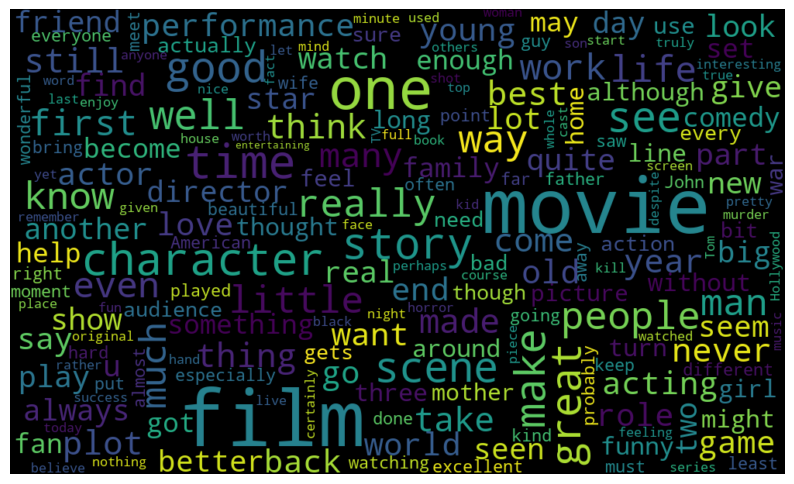

In [12]:
#wordcloud(print all words in image)
reviews=' '.join(word for word in df['Review'][df['Sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=1000,height=600, max_font_size=100)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

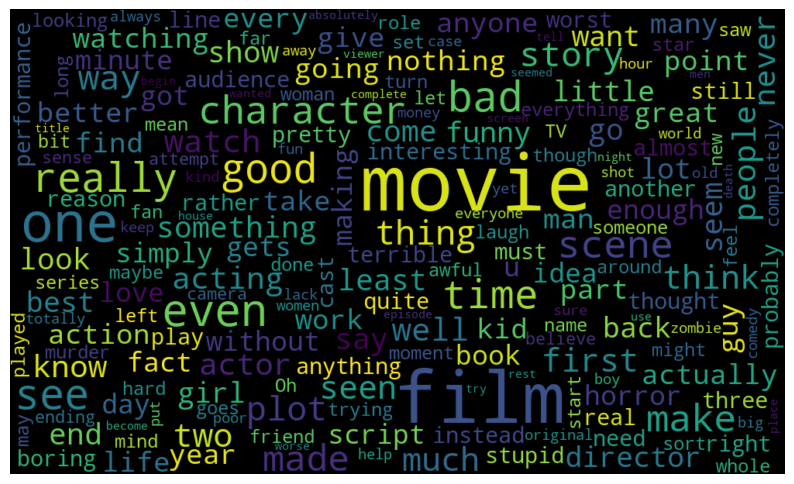

In [13]:
reviews=' '.join(word for word in df['Review'][df['Sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df['Sentiment'].replace({'negative':0,'positive':1},inplace=True)

C:\Users\srish\AppData\Local\Temp\ipykernel_20344\521742988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment'].replace({'negative':0,'positive':1},inplace=True)
C:\Users\srish\AppData\Local\Temp\ipykernel_20344\521742988.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentim

In [15]:
df['Sentiment'].value_counts()

Sentiment
0    263
1    237
Name: count, dtype: int64

In [16]:
model=LogisticRegression()

In [17]:
x_train,x_test,y_train,y_test=train_test_split(df['Review'],df['Sentiment'],test_size=0.2)

In [18]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model.fit(x_train, y_train)

LogisticRegression()

In [19]:
predict=model.predict(x_test)

In [20]:
accuracy_score(y_test,predict)

0.8

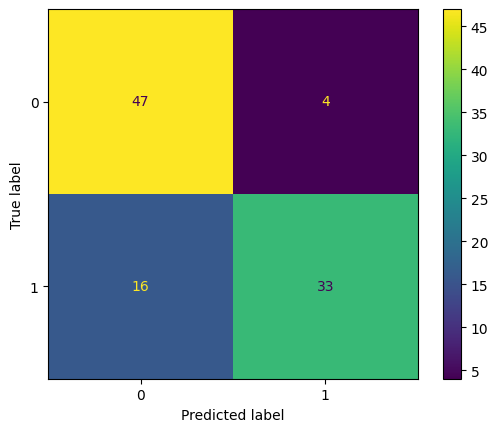

In [21]:
cm=confusion_matrix(y_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [22]:
import pickle as pk


In [23]:
pk.dump(model, open('model.pkl', 'wb'))

In [24]:
pk.dump(vectorizer.vocabulary_,open('vocab.pkl','wb'))

In [25]:
pk.dump(vectorizer, open('vectorizer.pkl', 'wb'))